In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Setup plotting style
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')


# 1 Data pre-processing

In [ ]:
# ! Comment out when submission
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/COMP90089/Group Assignment/ami_features_24h.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# checking missing values
df.isnull().sum().sort_values(ascending=False)

,0
lactate,2017
vasopressor_use,663
glucose,31
creatinine,23
potassium,19
sodium,19
hr_min,8
hr_mean,8
hr_max,8
age,0


In [ ]:
# use median to replace
for col in ['glucose', 'creatinine', 'potassium', 'sodium', 'hr_mean', 'hr_min', 'hr_max']:
    df[col].fillna(df[col].median(), inplace=True)

# vasopressor_use: put 0 to show no use
df['vasopressor_use'].fillna(0, inplace=True)

# too many lactate values missing, remove
df.drop(columns=['lactate'], inplace=True)

# checking missing values
df.isnull().sum().sort_values(ascending=False)


,0
subject_id,0
hadm_id,0
stay_id,0
hospital_expire_flag,0
age,0
gender,0
race,0
hypertension,0
diabetes,0
copd,0


In [ ]:
continuous_features = ['hr_mean', 'hr_min', 'hr_max',
                       'creatinine', 'glucose',
                       'sodium', 'potassium']
scaler = StandardScaler()

df[continuous_features] = scaler.fit_transform(df[continuous_features])
df

,subject_id,hadm_id,stay_id,hospital_expire_flag,age,gender,race,hypertension,diabetes,copd,...,hr_mean,hr_min,hr_max,creatinine,glucose,sodium,potassium,vasopressor_use,icu_expire_flag,death_30d_post_discharge
0,12012181,26862482,39532390,0,0,F,WHITE,1,0,0,...,1.652390,2.240709,0.411594,-0.350878,-0.295980,0.015247,-0.157682,0.0,0,0
1,14204585,21383476,36095793,0,1,F,BLACK/CAPE VERDEAN,0,1,0,...,0.080195,0.677263,-0.488631,-0.350878,-0.295980,0.015247,-0.157682,0.0,0,0
2,10313200,24896438,32380148,0,0,F,WHITE - OTHER EUROPEAN,0,1,1,...,-0.519808,0.075938,-0.938744,-0.350878,-0.295980,0.015247,-0.157682,0.0,0,0
3,13680152,22145795,36046814,0,0,M,ASIAN,0,0,0,...,-0.943744,-0.705785,-0.983756,-0.350878,-0.295980,0.015247,-0.157682,0.0,0,0
4,17681159,23316013,34182123,0,4,M,WHITE,0,0,0,...,-0.219626,-0.044327,-0.488631,-0.350878,-0.295980,0.015247,-0.157682,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6592,15589457,24539514,32403533,0,1,F,BLACK/AFRICAN AMERICAN,1,0,1,...,-1.202748,-0.886182,-0.533643,0.324198,0.279266,5.332575,-1.243285,1.0,0,1
6593,12363746,29652401,33655764,0,9,M,BLACK/AFRICAN AMERICAN,1,1,0,...,2.092355,0.857661,2.752181,-0.310374,0.918227,5.359928,-1.221398,1.0,0,0
6594,16482991,23627270,37471366,0,0,F,BLACK/AFRICAN AMERICAN,0,0,0,...,0.062468,0.015806,-0.173552,0.243188,-0.725595,5.441985,-2.118772,0.0,0,0
6595,12392956,29708494,30502944,0,0,F,WHITE,1,1,0,...,1.039454,0.316468,2.842204,-0.026842,4.123953,6.864316,0.770334,1.0,0,1


In [ ]:
def simplify_race(race_str):
    if pd.isnull(race_str):
        return 'Unknown'
    race_str = race_str.upper()

    if 'WHITE' in race_str:
        return 'White'
    elif 'BLACK' in race_str:
        return 'Black'
    elif 'ASIAN' in race_str:
        return 'Asian'
    elif 'HISPANIC' in race_str or 'LATINO' in race_str:
        return 'Hispanic'
    elif ('PORTUGUESE' in race_str or
          'AMERICAN INDIAN' in race_str or
          'NATIVE HAWAIIAN' in race_str or
          'SOUTH AMERICAN' in race_str or
          'MULTIPLE RACE' in race_str):
        return 'Other'
    elif ('UNKNOWN' in race_str or
          'UNABLE TO OBTAIN' in race_str or
          'PATIENT DECLINED' in race_str):
        return 'Unknown'
    else:
        return 'Other'  # catch-all fallback


In [ ]:
df['race_grouped'] = df['race'].apply(simplify_race)
print(df['race_grouped'].value_counts())

race_grouped
White       4165
Unknown     1164
Black        642
Other        247
Asian        198
Hispanic     181
Name: count, dtype: int64


In [ ]:
# One-hot encode
df = pd.get_dummies(df, columns=['gender', 'race_grouped'], drop_first=True)


In [ ]:
df

,subject_id,hadm_id,stay_id,hospital_expire_flag,age,race,hypertension,diabetes,copd,ckd,...,potassium,vasopressor_use,icu_expire_flag,death_30d_post_discharge,gender_M,race_grouped_Black,race_grouped_Hispanic,race_grouped_Other,race_grouped_Unknown,race_grouped_White
0,12012181,26862482,39532390,0,0,WHITE,1,0,0,0,...,-0.157682,0.0,0,0,False,False,False,False,False,True
1,14204585,21383476,36095793,0,1,BLACK/CAPE VERDEAN,0,1,0,1,...,-0.157682,0.0,0,0,False,True,False,False,False,False
2,10313200,24896438,32380148,0,0,WHITE - OTHER EUROPEAN,0,1,1,1,...,-0.157682,0.0,0,0,False,False,False,False,False,True
3,13680152,22145795,36046814,0,0,ASIAN,0,0,0,0,...,-0.157682,0.0,0,0,True,False,False,False,False,False
4,17681159,23316013,34182123,0,4,WHITE,0,0,0,1,...,-0.157682,0.0,0,0,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6592,15589457,24539514,32403533,0,1,BLACK/AFRICAN AMERICAN,1,0,1,0,...,-1.243285,1.0,0,1,False,True,False,False,False,False
6593,12363746,29652401,33655764,0,9,BLACK/AFRICAN AMERICAN,1,1,0,0,...,-1.221398,1.0,0,0,True,True,False,False,False,False
6594,16482991,23627270,37471366,0,0,BLACK/AFRICAN AMERICAN,0,0,0,1,...,-2.118772,0.0,0,0,False,True,False,False,False,False
6595,12392956,29708494,30502944,0,0,WHITE,1,1,0,0,...,0.770334,1.0,0,1,False,False,False,False,False,True


## **1.1 ICU mortality**

In [ ]:
y_icu = df['icu_expire_flag']
X_icu = df.drop(columns=['icu_expire_flag', 'hospital_expire_flag', 'death_30d_post_discharge','subject_id','hadm_id','stay_id','race'])

X_train_icu, X_test_icu, y_train_icu, y_test_icu = train_test_split(
    X_icu, y_icu, test_size=0.2, random_state=42, stratify=y_icu
)

# standardise continuous variable
num_cols = X_train_icu.select_dtypes(include=['int64', 'float64']).columns
num_cols = [col for col in num_cols if set(X_train_icu[col].unique()) != {0,1}]

scaler = StandardScaler()
X_train_icu[num_cols] = scaler.fit_transform(X_train_icu[num_cols])
X_test_icu[num_cols] = scaler.transform(X_test_icu[num_cols])

print("ICU mortality positive rate:", y_train_icu.mean())


ICU mortality positive rate: 0.13682016297138525


## **1.2 Hospital mortality**

In [ ]:
# check rate to ensure a relatively balanced dataset
df['hospital_expire_flag'].value_counts(normalize=True)


,proportion
hospital_expire_flag,
0,0.800364
1,0.199636


In [ ]:
y = df['hospital_expire_flag']
X = df.drop(columns=['icu_expire_flag', 'hospital_expire_flag', 'death_30d_post_discharge','subject_id','hadm_id','stay_id','race'])

# 80% training, 20% test
X_train_hos, X_test_hos, y_train_hos, y_test_hos = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train_hos.shape)
print("Test shape:", X_test_hos.shape)
print("Train positive rate:", y_train_hos.mean())
print("Test positive rate:", y_test_hos.mean())

Train shape: (5277, 20)
Test shape: (1320, 20)
Train positive rate: 0.19954519613416713
Test positive rate: 0.2


In [ ]:
num_cols = X_train_hos.select_dtypes(include=['int64', 'float64']).columns
num_cols = [col for col in num_cols if set(X_train_hos[col].unique()) != {0,1}]

scaler = StandardScaler()
X_train_hos[num_cols] = scaler.fit_transform(X_train_hos[num_cols])
X_test_hos[num_cols] = scaler.transform(X_test_hos[num_cols])


## **1.3 Post-discharge mortality**

In [ ]:
y_post = df['death_30d_post_discharge']
X_post = df.drop(columns=['icu_expire_flag', 'hospital_expire_flag', 'death_30d_post_discharge','subject_id','hadm_id','stay_id','race'])

X_train_post, X_test_post, y_train_post, y_test_post = train_test_split(
    X_post, y_post, test_size=0.2, random_state=42, stratify=y_post
)

X_train_post[num_cols] = scaler.fit_transform(X_train_post[num_cols])
X_test_post[num_cols] = scaler.transform(X_test_post[num_cols])

print("Post-discharge 30-day mortality positive rate:", y_train_post.mean())


Post-discharge 30-day mortality positive rate: 0.07238961531173015


# 2 LGB

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    accuracy_score,precision_score,recall_score,f1_score,
    roc_auc_score, average_precision_score,
    roc_curve, precision_recall_curve,
    confusion_matrix, classification_report
)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6597 entries, 0 to 6596
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   subject_id                6597 non-null   int64  
 1   hadm_id                   6597 non-null   int64  
 2   stay_id                   6597 non-null   int64  
 3   hospital_expire_flag      6597 non-null   int64  
 4   age                       6597 non-null   int64  
 5   race                      6597 non-null   object 
 6   hypertension              6597 non-null   int64  
 7   diabetes                  6597 non-null   int64  
 8   copd                      6597 non-null   int64  
 9   ckd                       6597 non-null   int64  
 10  heart_failure             6597 non-null   int64  
 11  hr_mean                   6597 non-null   float64
 12  hr_min                    6597 non-null   float64
 13  hr_max                    6597 non-null   float64
 14  creatini

## 2.1 ICU Mortality


In [ ]:
# Define the parameter grid
param_grid = {
    'num_leaves': [15, 31, 63],
    'max_depth': [-1, 5, 10]
}

# Instantiate StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Instantiate LGBMClassifier
lgbm = LGBMClassifier(
     objective='binary',
     n_estimators=500,
     learning_rate=0.01,
     subsample=0.8,
     colsample_bytree=0.8,
     class_weight='balanced',
     verbose = -1,
     random_state=42
     )

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_icu, y_train_icu)

# Print the best hyperparameters
print("Best hyperparameters for ICU mortality:", grid_search.best_params_)

Best hyperparameters for ICU mortality: {'max_depth': 10, 'num_leaves': 31}


In [ ]:
# Instantiate LGBMClassifier with best hyperparameters and class_weight='balanced'
best_lgbm_icu = LGBMClassifier(**lgbm.get_params())

# Update the parameters with the best ones found by GridSearchCV
best_lgbm_icu.set_params(
    num_leaves=grid_search.best_params_['num_leaves'],
    max_depth=grid_search.best_params_['max_depth']
)


# Train the model
best_lgbm_icu.fit(X_train_icu, y_train_icu)

# Make predictions
y_pred_icu = best_lgbm_icu.predict(X_test_icu)
y_pred_proba_icu = best_lgbm_icu.predict_proba(X_test_icu)[:, 1]

# Evaluate the model
lgb_accuracy_icu = accuracy_score(y_test_icu, y_pred_icu)
lgb_precision_icu = precision_score(y_test_icu, y_pred_icu)
lgb_recall_icu = recall_score(y_test_icu, y_pred_icu)
lgb_f1_icu = f1_score(y_test_icu, y_pred_icu)
lgb_auroc_icu = roc_auc_score(y_test_icu, y_pred_proba_icu)
lgb_auprc_icu = average_precision_score(y_test_icu, y_pred_proba_icu)

# Display evaluation metrics
print("ICU Mortality Model Evaluation:")
print(f"Accuracy: {lgb_accuracy_icu:.4f}")
print(f"Precision: {lgb_precision_icu:.4f}")
print(f"Recall: {lgb_recall_icu:.4f}")
print(f"F1-Score: {lgb_f1_icu:.4f}")
print(f"AUROC: {lgb_auroc_icu:.4f}")
print(f"AUPRC: {lgb_auprc_icu:.4f}")

ICU Mortality Model Evaluation:
Accuracy: 0.7689
Precision: 0.3360
Recall: 0.7111
F1-Score: 0.4563
AUROC: 0.8287
AUPRC: 0.4694


## 2.2 Hospital Mortality

In [ ]:
# Define the parameter grid for hospital mortality
param_grid_hos = {
    'num_leaves': [15, 31, 63],
    'max_depth': [-1, 5, 10]
}

# Instantiate StratifiedKFold
cv_hos = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Instantiate LGBMClassifier
lgbm_hos = LGBMClassifier(
     objective='binary',
     n_estimators=500,
     learning_rate=0.01,
     subsample=0.8,
     colsample_bytree=0.8,
     class_weight='balanced',
     verbose = -1,
     random_state=42
     )

# Instantiate GridSearchCV
grid_search_hos = GridSearchCV(estimator=lgbm_hos, param_grid=param_grid_hos, cv=cv_hos, scoring='f1', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search_hos.fit(X_train_hos, y_train_hos)

# Print the best hyperparameters
print("Best hyperparameters for Hospital mortality:", grid_search_hos.best_params_)

Best hyperparameters for Hospital mortality: {'max_depth': 10, 'num_leaves': 31}


In [ ]:
# Instantiate LGBMClassifier with best hyperparameters and class_weight='balanced'
best_lgbm_hos = LGBMClassifier(**lgbm_hos.get_params())

# Update the parameters with the best ones found by GridSearchCV
best_lgbm_hos.set_params(
    num_leaves=grid_search_hos.best_params_['num_leaves'],
    max_depth=grid_search_hos.best_params_['max_depth']
)

# Train the model
best_lgbm_hos.fit(X_train_hos, y_train_hos)

# Make predictions
y_pred_hos = best_lgbm_hos.predict(X_test_hos)
y_pred_proba_hos = best_lgbm_hos.predict_proba(X_test_hos)[:, 1]

# Evaluate the model
lgb_accuracy_hos = accuracy_score(y_test_hos, y_pred_hos)
lgb_precision_hos = precision_score(y_test_hos, y_pred_hos)
lgb_recall_hos = recall_score(y_test_hos, y_pred_hos)
lgb_f1_hos = f1_score(y_test_hos, y_pred_hos)
lgb_auroc_hos = roc_auc_score(y_test_hos, y_pred_proba_hos)
lgb_auprc_hos = average_precision_score(y_test_hos, y_pred_proba_hos)

# Display evaluation metrics
print("Hospital Mortality Model Evaluation:")
print(f"Accuracy: {lgb_accuracy_hos:.4f}")
print(f"Precision: {lgb_precision_hos:.4f}")
print(f"Recall: {lgb_recall_hos:.4f}")
print(f"F1-Score: {lgb_f1_hos:.4f}")
print(f"AUROC: {lgb_auroc_hos:.4f}")
print(f"AUPRC: {lgb_auprc_hos:.4f}")

Hospital Mortality Model Evaluation:
Accuracy: 0.7583
Precision: 0.4324
Recall: 0.6667
F1-Score: 0.5246
AUROC: 0.8058
AUPRC: 0.5361


## 2.3 Post-discharge Mortality

In [ ]:
# Define the parameter grid for post-discharge mortality
param_grid_post = {
    'num_leaves': [15, 31, 63],
    'max_depth': [-1, 5, 10]
}

# Instantiate StratifiedKFold
cv_post = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Instantiate LGBMClassifier
lgbm_post = LGBMClassifier(
     objective='binary',
     n_estimators=500,
     learning_rate=0.01,
     subsample=0.8,
     colsample_bytree=0.8,
     class_weight='balanced',
     verbose = -1,
     random_state=42
     )

# Instantiate GridSearchCV
grid_search_post = GridSearchCV(estimator=lgbm_post, param_grid=param_grid_post, cv=cv_post, scoring='f1', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search_post.fit(X_train_post, y_train_post)

# Print the best hyperparameters
print("Best hyperparameters for Post-discharge mortality:", grid_search_post.best_params_)

Best hyperparameters for Post-discharge mortality: {'max_depth': -1, 'num_leaves': 63}


In [ ]:
# Instantiate LGBMClassifier with best hyperparameters and class_weight='balanced'
best_lgbm_post = LGBMClassifier(**lgbm_post.get_params())

# Update the parameters with the best ones found by GridSearchCV
best_lgbm_post.set_params(
    num_leaves=grid_search_post.best_params_['num_leaves'],
    max_depth=grid_search_post.best_params_['max_depth']
)

# Train the model
best_lgbm_post.fit(X_train_post, y_train_post)

# Make predictions
y_pred_post = best_lgbm_post.predict(X_test_post)
y_pred_proba_post = best_lgbm_post.predict_proba(X_test_post)[:, 1]

# Evaluate the model
lgb_accuracy_post = accuracy_score(y_test_post, y_pred_post)
lgb_precision_post = precision_score(y_test_post, y_pred_post)
lgb_recall_post = recall_score(y_test_post, y_pred_post)
lgb_f1_post = f1_score(y_test_post, y_pred_post)
lgb_auroc_post = roc_auc_score(y_test_post, y_pred_proba_post)
lgb_auprc_post = average_precision_score(y_test_post, y_pred_proba_post)

# Display evaluation metrics
print("Post-discharge Mortality Model Evaluation:")
print(f"Accuracy: {lgb_accuracy_post:.4f}")
print(f"Precision: {lgb_precision_post:.4f}")
print(f"Recall: {lgb_recall_post:.4f}")
print(f"F1-Score: {lgb_f1_post:.4f}")
print(f"AUROC: {lgb_auroc_post:.4f}")
print(f"AUPRC: {lgb_auprc_post:.4f}")

Post-discharge Mortality Model Evaluation:
Accuracy: 0.9076
Precision: 0.3151
Recall: 0.2421
F1-Score: 0.2738
AUROC: 0.7191
AUPRC: 0.2821


# 3 Result

## 3.1 Comfusion matrix

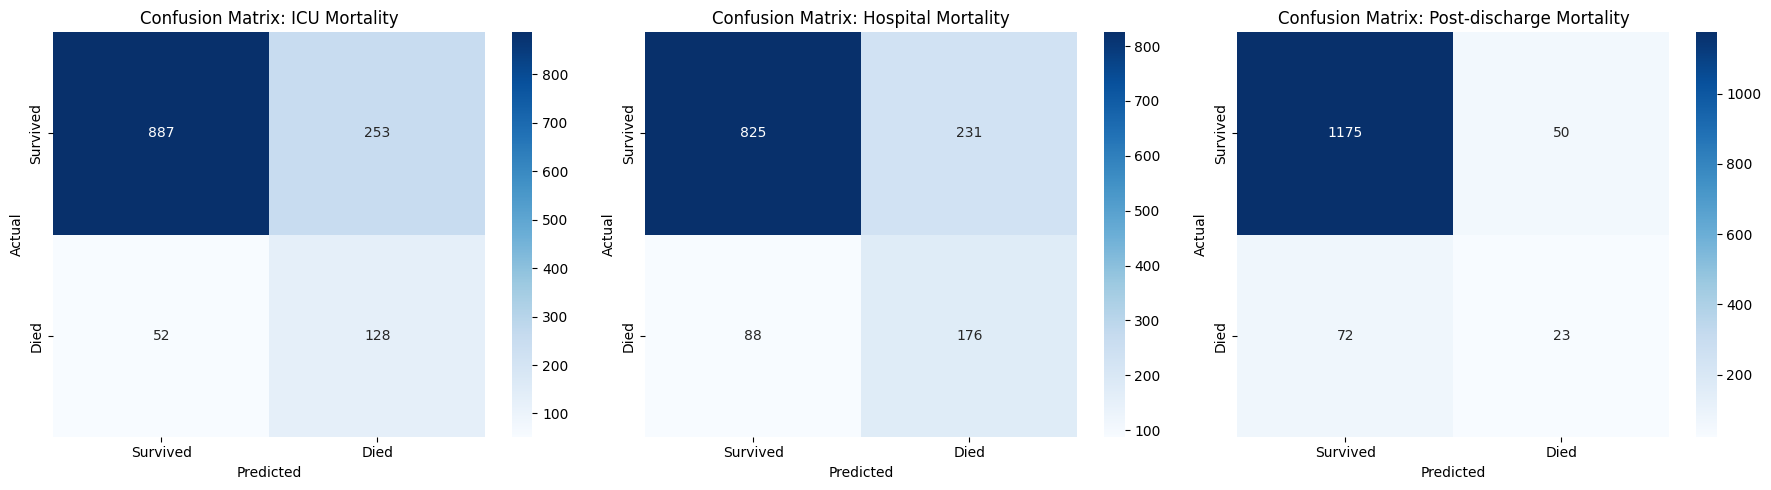

In [ ]:
# Draw confusion matrices for each model
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
titles = ['ICU Mortality', 'Hospital Mortality', 'Post-discharge Mortality']
y_tests = [y_test_icu, y_test_hos, y_test_post]
y_preds = [y_pred_icu, y_pred_hos, y_pred_post]

for i, ax in enumerate(axes):
    cm = confusion_matrix(y_tests[i], y_preds[i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix: {titles[i]}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_xticks([0.5, 1.5])
    ax.set_yticks([0.5, 1.5])
    ax.set_xticklabels(['Survived', 'Died'])
    ax.set_yticklabels(['Survived', 'Died'])

plt.tight_layout()
plt.show()

In [ ]:
# Create a table to compare recall, precision, F1-score (on died class), and accuracy for each model
comparison_metrics_lgb = pd.DataFrame({
    "Prediction Horizon": ['ICU', 'In-hospital', 'Post-discharge'],
    "Accuracy": [lgb_accuracy_icu, lgb_accuracy_hos, lgb_accuracy_post],
    "Precision (Died)": [lgb_precision_icu, lgb_precision_hos, lgb_precision_post],
    "Recall (Died)": [lgb_recall_icu, lgb_recall_hos, lgb_recall_post],
    "F1-Score (Died)": [lgb_f1_icu, lgb_f1_hos, lgb_f1_post]
})

print("LightGBM Model Performance Comparison:")
comparison_metrics_lgb.round(3)

LightGBM Model Performance Comparison:


,Prediction Horizon,Accuracy,Precision (Died),Recall (Died),F1-Score (Died)
0,ICU,0.769,0.336,0.711,0.456
1,In-hospital,0.758,0.432,0.667,0.525
2,Post-discharge,0.908,0.315,0.242,0.274


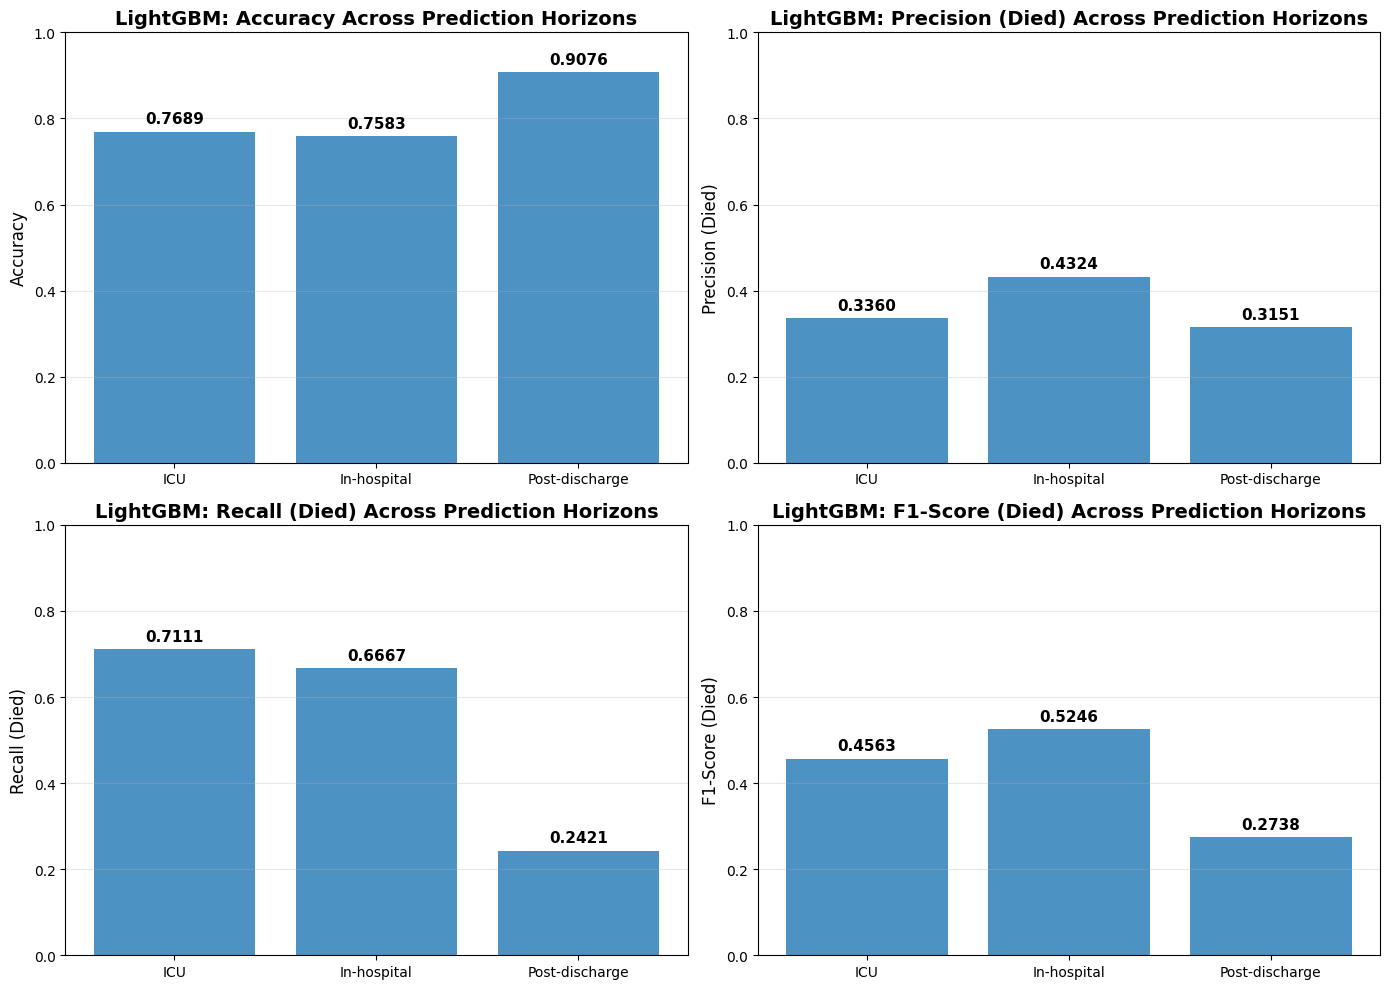

In [ ]:
# Bar charts for Accuracy, Precision, Recall, and F1-Score by horizon
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten() # Flatten the 2x2 grid of axes to easily iterate
horizons = comparison_metrics_lgb["Prediction Horizon"].values
metrics = ["Accuracy", "Precision (Died)", "Recall (Died)", "F1-Score (Died)"]
titles = ["Accuracy", "Precision (Died)", "Recall (Died)", "F1-Score (Died)"]

for i, metric in enumerate(metrics):
    ax = axes[i]
    ax.bar(horizons, comparison_metrics_lgb[metric], alpha=0.8)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_title(f"LightGBM: {titles[i]} Across Prediction Horizons", fontsize=14, fontweight="bold")
    ax.set_ylim(0, 1)
    ax.grid(True, alpha=0.3, axis="y")
    for j, v in enumerate(comparison_metrics_lgb[metric]):
        ax.text(j, min(v + 0.02, 0.98), f"{v:.4f}", ha="center", fontsize=11, fontweight="bold")

plt.tight_layout()
plt.show()

**Analysis**

1) **ICU & in-hospital:** recall is reasonably strong with moderate precision → workable for risk-flagging workflows if thresholds are set appropriately.

2) **Post-discharge:** high accuracy is misleading (class imbalance); recall ~0.24 means many true events are missed unless you lower the threshold (at cost of precision). This phase likely needs extra features beyond early ICU physiology (e.g., discharge meds, comorbidity depth, follow-up proxies).

## 3.2 AUROC AUPRC

In [ ]:
# Build a results summary dict using variables already computed in the LGB notebook.
# This mirrors the structure used in the MLP notebook so the plotting code is parallel.

import numpy as np
import pandas as pd

results_summary_lgb = {
    "ICU": {
        "y_test":        y_test_icu,
        "y_pred_proba":  y_pred_proba_icu,
        "AUROC":         float(lgb_auroc_icu),
        "AUPRC":         float(lgb_auprc_icu),
    },
    "In-hospital": {
        "y_test":        y_test_hos,
        "y_pred_proba":  y_pred_proba_hos,
        "AUROC":         float(lgb_auroc_hos),
        "AUPRC":         float(lgb_auprc_hos),
    },
    "Post-discharge": {
        "y_test":        y_test_post,
        "y_pred_proba":  y_pred_proba_post,
        "AUROC":         float(lgb_auroc_post),
        "AUPRC":         float(lgb_auprc_post),
    },
}

# Small, clean comparison table (same shape as in MLP notebook)
comparison_df_lgb = pd.DataFrame({
    "Prediction Horizon": list(results_summary_lgb.keys()),
    "AUROC": [d["AUROC"] for d in results_summary_lgb.values()],
    "AUPRC": [d["AUPRC"] for d in results_summary_lgb.values()],
})

print("LightGBM Model Performance Summary:")
print(comparison_df_lgb.to_string(index=False))


LightGBM Model Performance Summary:
Prediction Horizon    AUROC    AUPRC
               ICU 0.828655 0.469435
       In-hospital 0.805796 0.536084
    Post-discharge 0.719072 0.282077


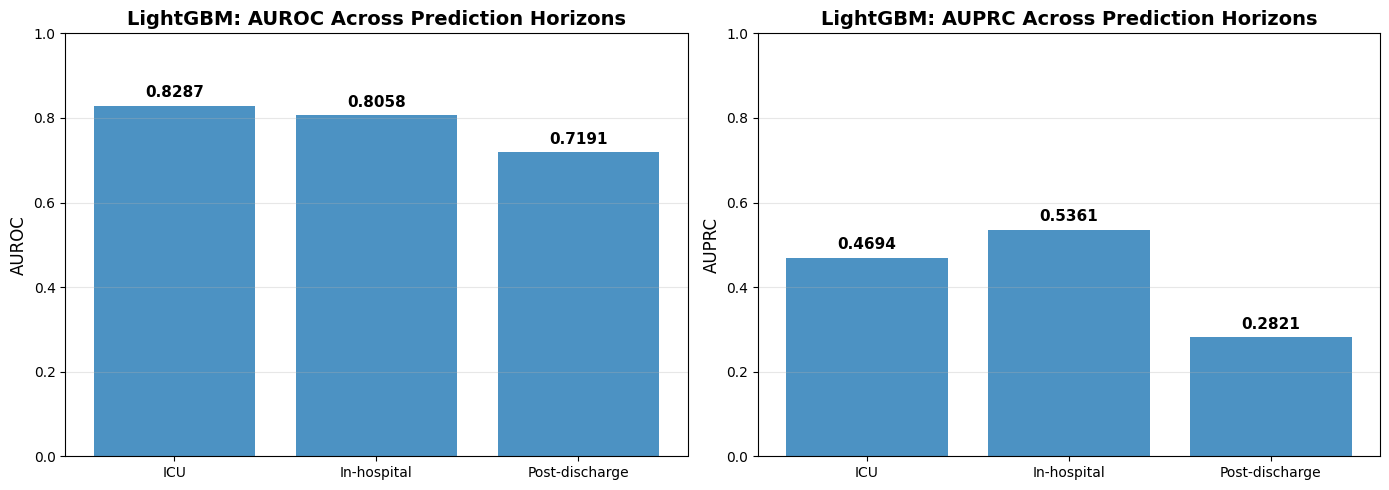

In [ ]:
# Bar charts for AUROC and AUPRC by horizon (parallel to the MLP figure).
# Keep styling simple and readable; annotate bars with values.

import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
horizons = comparison_df_lgb["Prediction Horizon"].values

# AUROC bar chart
ax1.bar(horizons, comparison_df_lgb["AUROC"], alpha=0.8)
ax1.set_ylabel("AUROC", fontsize=12)
ax1.set_title("LightGBM: AUROC Across Prediction Horizons", fontsize=14, fontweight="bold")
ax1.set_ylim(0, 1)
ax1.grid(True, alpha=0.3, axis="y")
for i, v in enumerate(comparison_df_lgb["AUROC"]):
    ax1.text(i, min(v + 0.02, 0.98), f"{v:.4f}", ha="center", fontsize=11, fontweight="bold")

# AUPRC bar chart
ax2.bar(horizons, comparison_df_lgb["AUPRC"], alpha=0.8)
ax2.set_ylabel("AUPRC", fontsize=12)
ax2.set_title("LightGBM: AUPRC Across Prediction Horizons", fontsize=14, fontweight="bold")
ax2.set_ylim(0, 1)
ax2.grid(True, alpha=0.3, axis="y")
for i, v in enumerate(comparison_df_lgb["AUPRC"]):
    ax2.text(i, min(v + 0.02, 0.98), f"{v:.4f}", ha="center", fontsize=11, fontweight="bold")

plt.tight_layout()
plt.show()


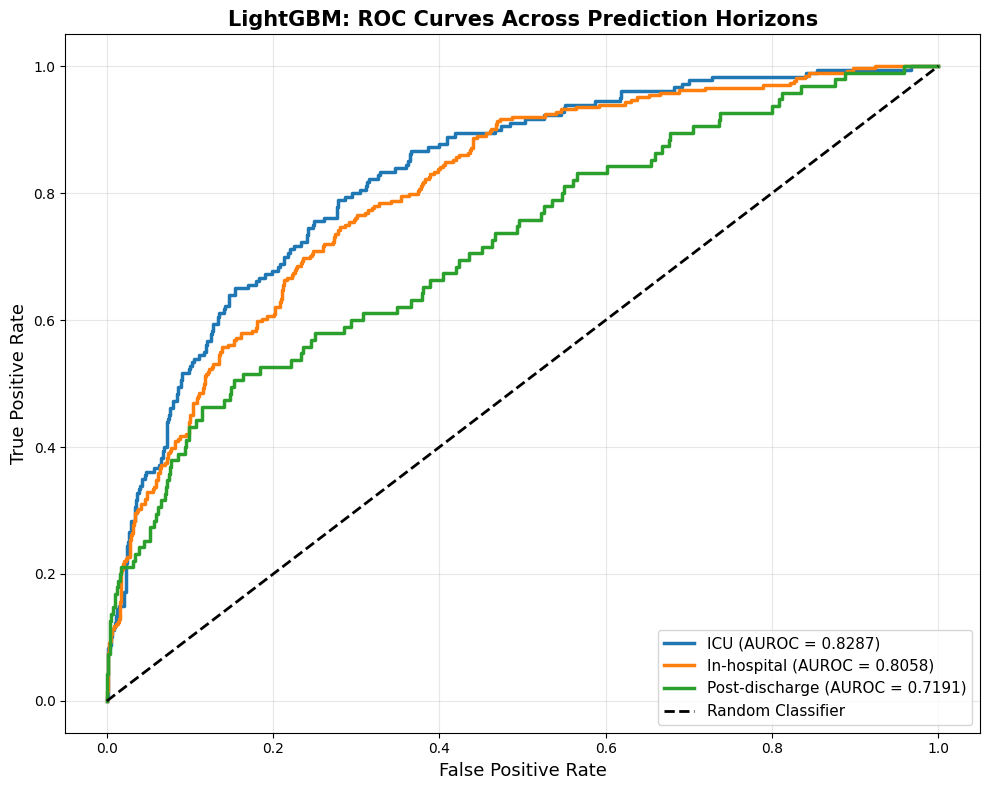

In [ ]:
# Overlaid ROC curves for each horizon using the LightGBM probabilities.
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 8))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

for i, (hname, res) in enumerate(results_summary_lgb.items()):
    fpr, tpr, _ = roc_curve(res["y_test"], res["y_pred_proba"])
    plt.plot(fpr, tpr, linewidth=2.5, label=f"{hname} (AUROC = {res['AUROC']:.4f})", color=colors[i])

plt.plot([0, 1], [0, 1], "k--", linewidth=2, label="Random Classifier")
plt.xlabel("False Positive Rate", fontsize=13)
plt.ylabel("True Positive Rate", fontsize=13)
plt.title("LightGBM: ROC Curves Across Prediction Horizons", fontsize=15, fontweight="bold")
plt.legend(fontsize=11, loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

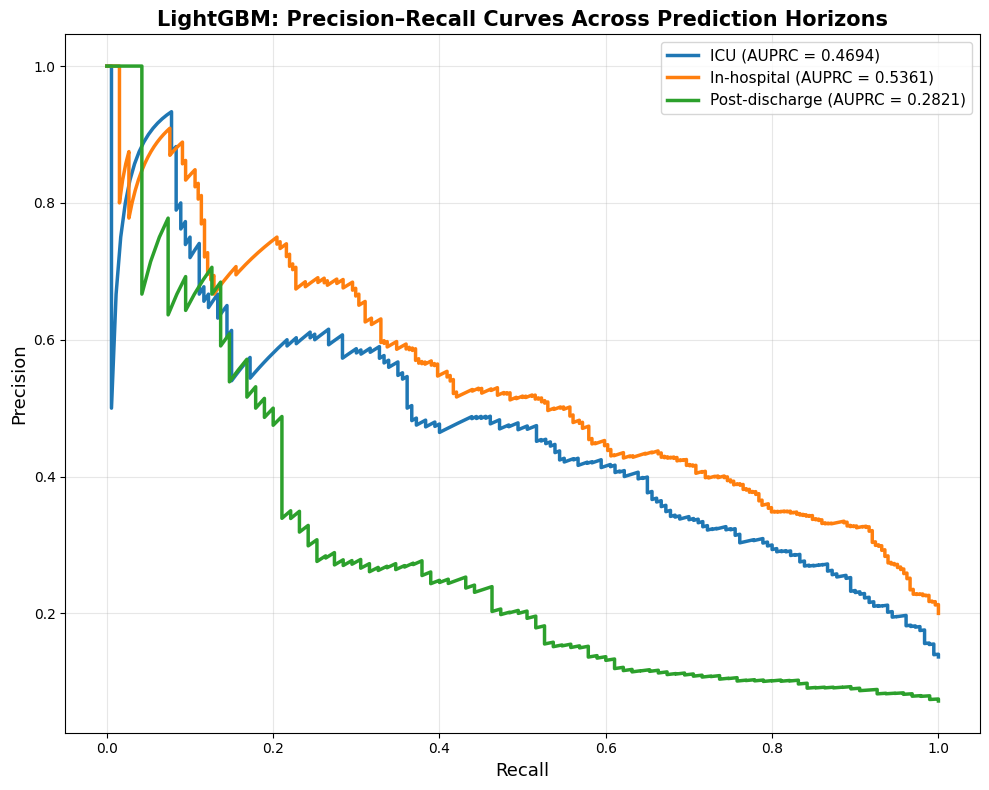

In [ ]:
# Overlaid PR curves for each horizon using the LightGBM probabilities.
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10, 8))

for i, (hname, res) in enumerate(results_summary_lgb.items()):
    precision, recall, _ = precision_recall_curve(res["y_test"], res["y_pred_proba"])
    plt.plot(recall, precision, linewidth=2.5, label=f"{hname} (AUPRC = {res['AUPRC']:.4f})", color=colors[i])

plt.xlabel("Recall", fontsize=13)
plt.ylabel("Precision", fontsize=13)
plt.title("LightGBM: Precision–Recall Curves Across Prediction Horizons", fontsize=15, fontweight="bold")
plt.legend(fontsize=11, loc="best")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Analysis**

1) **Near-term risk is predicted best**. AUROC drops as the horizon lengthens (ICU > in-hospital > post-discharge), consistent with acute physiology losing predictive power for longer-term outcomes.

2) **AUPRC beats the base rate in all phases** (e.g., ICU 0.469 vs 0.137 baseline; post-discharge 0.282 vs 0.072). So the model adds precision beyond “chance” at clinically relevant recall levels — even for the most imbalanced task.

## 3.3 DCA

In [ ]:
pip install dcurves

Performing DCA for: ICU Mortality
Performing DCA for: In-Hospital Mortality
Performing DCA for: 30-Day Post-Discharge Mortality


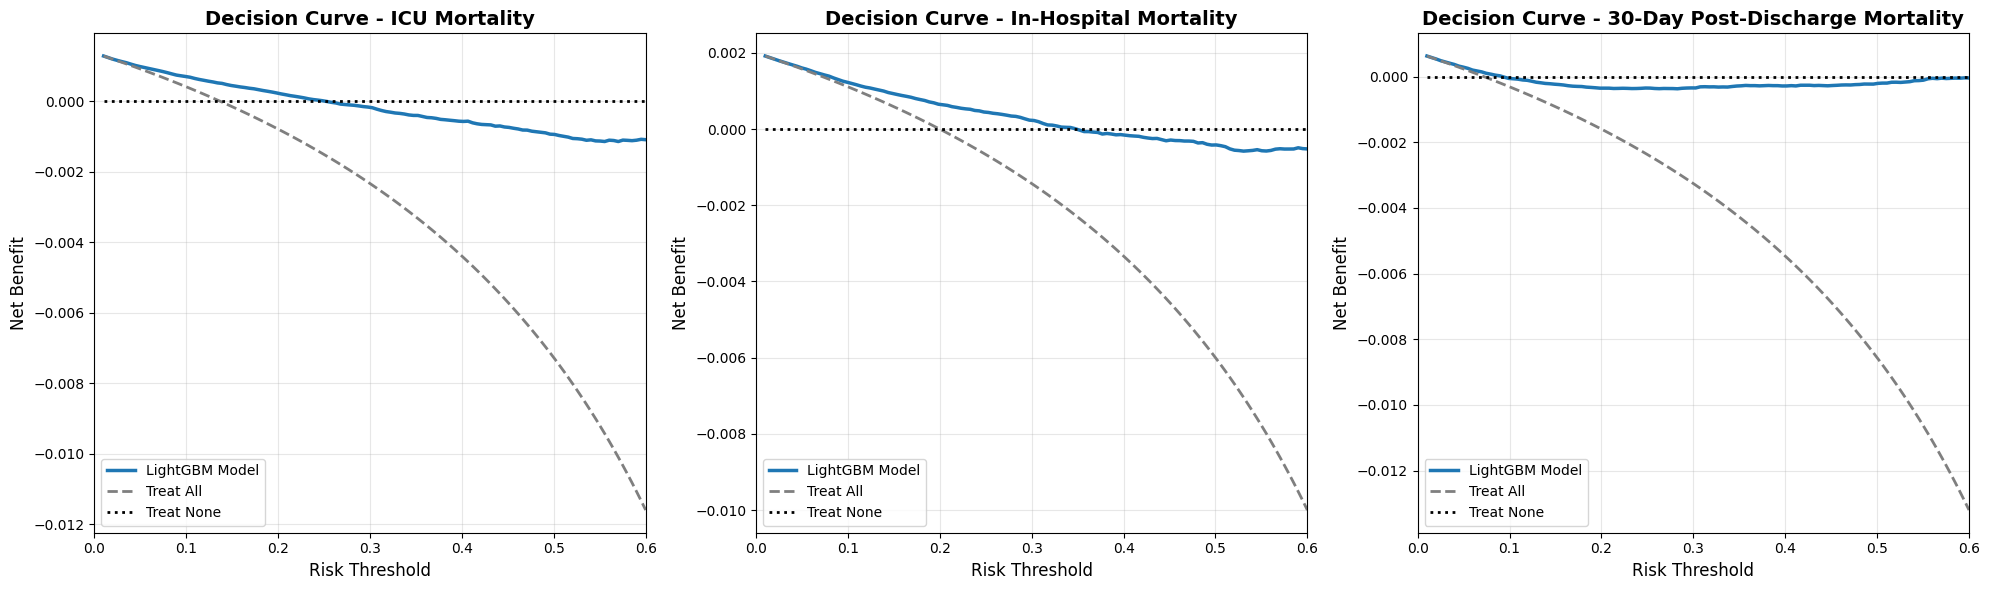

In [ ]:
#  DCA plots using dcurves
from dcurves import dca

# Use the thresholds avoid extremes
thresholds = np.linspace(0.01, 0.60, 120)

# Define colors/styles
MODEL_COLOR = "#1f77b4"   # blue
ALL_COLOR   = "#7f7f7f"   # grey
NONE_COLOR  = "k"         # black

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
titles = ["ICU Mortality", "In-Hospital Mortality", "30-Day Post-Discharge Mortality"]

for ax, (hname, res), title in zip(axes, results_summary_lgb.items(), titles):
    print(f"Performing DCA for: {title}")

    df = pd.DataFrame({
        "outcome": res["y_test"].astype(int),
        "prob": res["y_pred_proba"].astype(float)
    })

    # Run DCA analysis (this computes per 100 patients)
    dca_out = dca(
        data=df,
        outcome="outcome",
        modelnames=["prob"],
        thresholds=thresholds
    )

    # Convert to per-patient scale (divide by 100)
    dca_out["net_benefit"] = dca_out["net_benefit"] / 100.0

    # Extract series
    m_df = dca_out[dca_out["model"] == "prob"]
    a_df = dca_out[dca_out["model"] == "all"]
    n_df = dca_out[dca_out["model"] == "none"]

    # Format lines
    ax.plot(m_df["threshold"], m_df["net_benefit"], color=MODEL_COLOR, lw=2.5, label="LightGBM Model")
    ax.plot(a_df["threshold"], a_df["net_benefit"], color=ALL_COLOR, lw=2.0, ls="--", label="Treat All")
    ax.plot(n_df["threshold"], n_df["net_benefit"], color=NONE_COLOR, lw=2.0, ls=":", label="Treat None")

    # Cosmetics
    ax.set_title(f"Decision Curve - {title}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Risk Threshold", fontsize=12)
    ax.set_ylabel("Net Benefit", fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0.0, thresholds.max())
    ymin = min(m_df["net_benefit"].min(), a_df["net_benefit"].min(), 0)
    ymax = max(m_df["net_benefit"].max(), a_df["net_benefit"].max(), 0)
    pad = 0.05 * (ymax - ymin + 1e-9)
    ax.set_ylim(ymin - pad, ymax + pad)
    ax.legend(fontsize=10, loc="lower left")

plt.tight_layout()
plt.show()


**Analysis**

The three decision curves illustrate how the **LightGBM model’s net benefit** compares with two benchmark strategies — *Treat All* (assuming every patient receives intervention) and *Treat None* (no one receives intervention).

1) **ICU Mortality**: The blue LightGBM curve is slightly above the “Treat All” line in the very low-risk region (0–0.1), but it remains close to zero or below elsewhere. The model shows minimal clinical utility, providing only a marginal benefit at very low thresholds (e.g., identifying extremely high-risk ICU patients).

2) **In-Hospital Mortality**: The model curve stays slightly higher than “Treat All” across most low-to-moderate thresholds (<0.2). This suggests the model provides a small but positive net benefit for early in-hospital mortality risk stratification.


3) **30-Day Post-Discharge Mortality**: The model curve almost overlaps with or drops below “Treat None.” The LightGBM model adds no clinical value for post-discharge mortality prediction, likely due to limited information about patient condition after discharge.



---



Across all three tasks, the net benefit values are extremely small (≈0.002 or less). Even though the LightGBM model may statistically discriminate outcomes, it does not meaningfully improve clinical decision-making relative to simple “treat all” or “treat none” strategies.

Short-term outcomes (ICU or in-hospital mortality) show slightly higher benefit, as these are closely linked to inpatient data (e.g., vital signs, lab results). However, post-discharge mortality depends heavily on unobserved post-hospital factors (follow-up care, comorbidities, social determinants), which are not captured in the model inputs.



## 3.4 Feature Importance


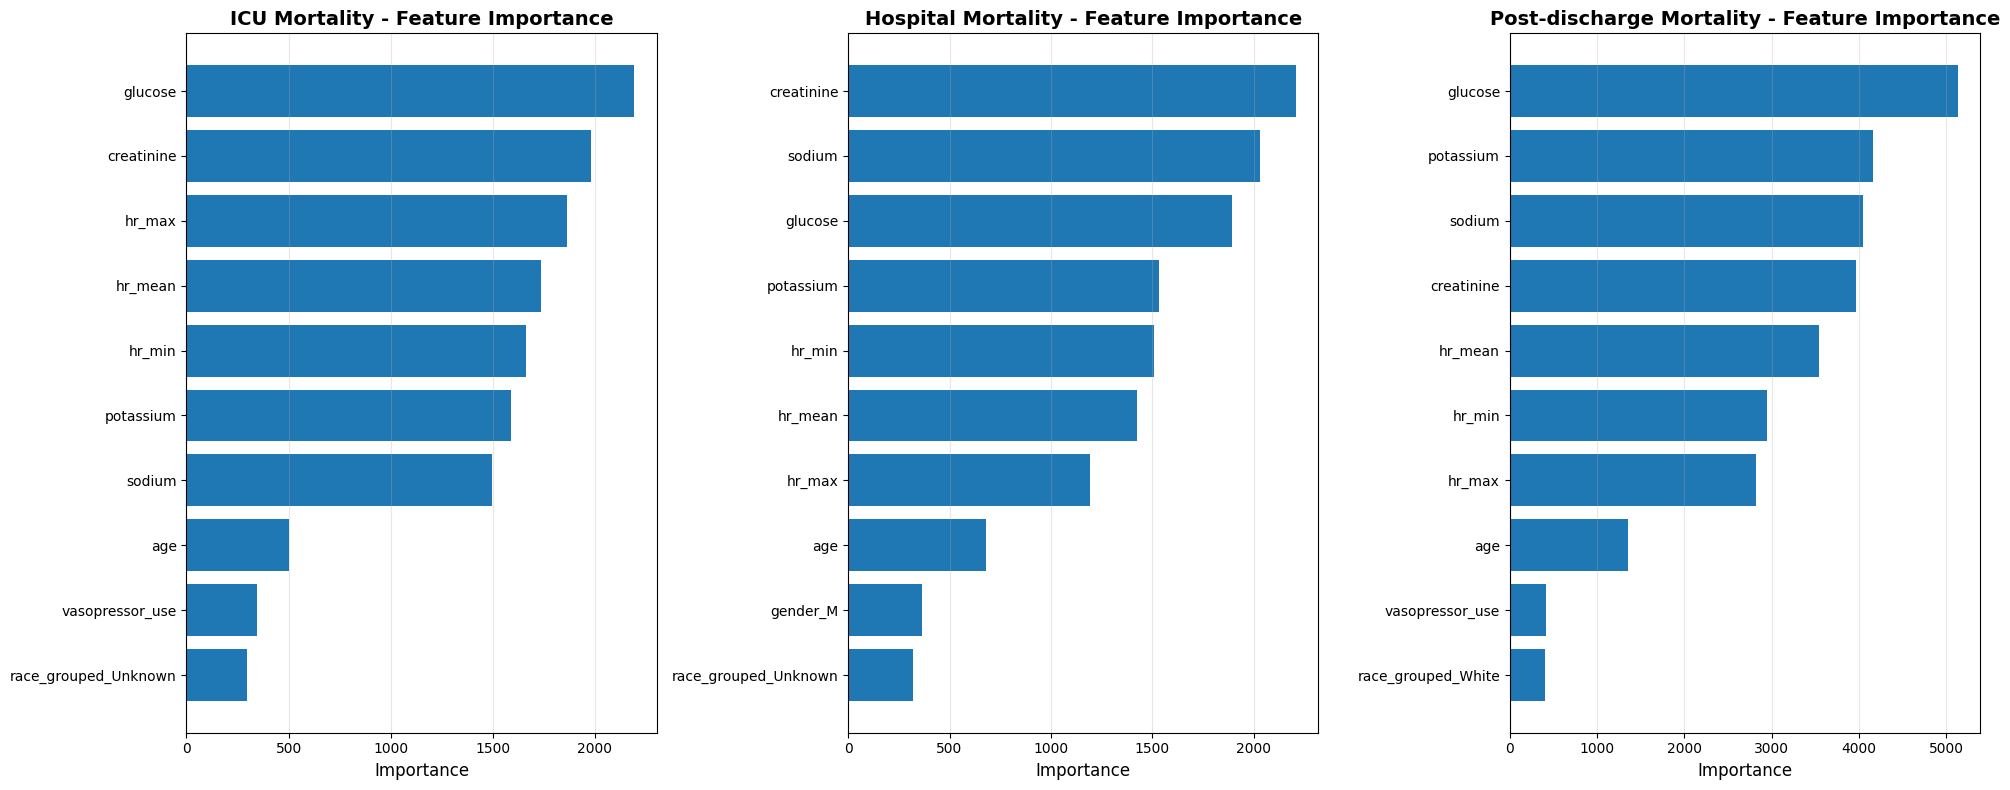

In [ ]:
# Calculate and visualize built-in LightGBM feature importance

import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance for each model
importance_icu = best_lgbm_icu.feature_importances_
importance_hos = best_lgbm_hos.feature_importances_
importance_post = best_lgbm_post.feature_importances_

# Get feature names (using the columns from one of the test sets, they are the same)
feature_names = X_test_icu.columns

# Create DataFrames for better handling and plotting
importance_df_icu = pd.DataFrame({'Feature': feature_names, 'Importance': importance_icu}).sort_values(by='Importance', ascending=False)
importance_df_hos = pd.DataFrame({'Feature': feature_names, 'Importance': importance_hos}).sort_values(by='Importance', ascending=False)
importance_df_post = pd.DataFrame({'Feature': feature_names, 'Importance': importance_post}).sort_values(by='Importance', ascending=False)

# Plotting the feature importance
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
titles = ['ICU Mortality - Feature Importance', 'Hospital Mortality - Feature Importance', 'Post-discharge Mortality - Feature Importance']
importance_dfs = [importance_df_icu, importance_df_hos, importance_df_post]

for i, ax in enumerate(axes):
    # Select top N features for clarity, adjust N as needed
    top_n = 10
    plot_df = importance_dfs[i].head(top_n)

    ax.barh(plot_df['Feature'], plot_df['Importance'])
    ax.set_xlabel('Importance', fontsize=12)
    ax.set_title(titles[i], fontsize=14, fontweight='bold')
    ax.invert_yaxis() # Highest importance at the top
    ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

**Analysis**

| Horizon        | Dominant feature category                         | Interpretation                                          |
| -------------- | ------------------------------------------------- | ------------------------------------------------------- |
| ICU            | Acute physiological (glucose, HR, creatinine)     | Reflects short-term critical instability                |
| In-Hospital    | Metabolic & renal (creatinine, sodium, potassium) | Captures systemic recovery or failure trajectory        |
| Post-Discharge | Biochemical chronic (glucose, electrolytes)       | Indicates long-term residual risk and metabolic control |


<br>
The LightGBM feature importances are clinically coherent:
* Glucose and creatinine consistently emerge as universal predictors.
* Electrolyte balance (sodium, potassium) gains importance with longer horizons.
* Heart-rate variability is most useful for short-term (ICU) prediction, while demographics gradually gain relevance as the time window extends.

This pattern suggests that the model captures a plausible physiological progression—from acute crisis to chronic vulnerability—across mortality horizons.

## 3.5 Model Configuration

**Best tuned hyperparameters**

* ICU: `max_depth=10`, `num_leaves=31`

* In-hospital: `max_depth=10`, `num_leaves=31`

* Post-discharge: `max_depth=-1 (unlimited)`, `num_leaves=63`


The longer-horizon model pushed to larger trees, which can overfit noisy signals at low prevalence — consistent with its lower AUROC and weak recall at common thresholds. If you recalibrate + regularise (cap depth/leaves, stronger min_data_in_leaf), you may trade a bit of fit for better generalisation.

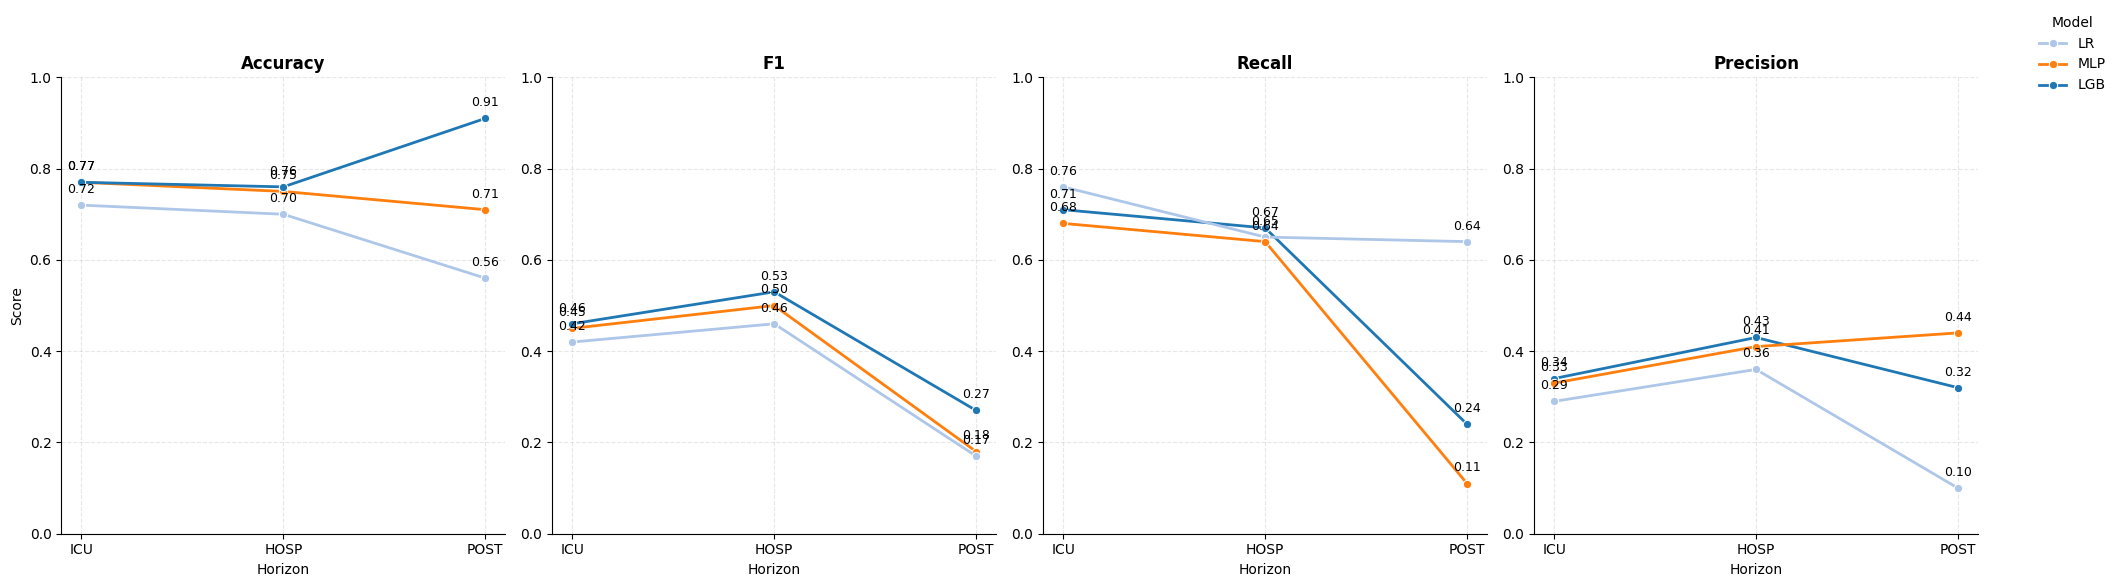

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = {
    'Metric': ['Accuracy', 'Accuracy', 'Accuracy', 'Recall', 'Recall', 'Recall',
                'Precision', 'Precision', 'Precision', 'F1', 'F1', 'F1'],
    'Stage': ['ICU', 'HOSP', 'POST'] * 4,
    'LR': [0.72, 0.70, 0.56, 0.76, 0.65, 0.64, 0.29, 0.36, 0.10, 0.42, 0.46, 0.17],
    'LGB': [0.77, 0.76, 0.91, 0.71, 0.67, 0.24, 0.34, 0.43, 0.32, 0.46, 0.53, 0.27],
    'MLP': [0.77, 0.75, 0.71, 0.68, 0.64, 0.11, 0.33, 0.41, 0.44, 0.45, 0.50, 0.18]
}
df = pd.melt(pd.DataFrame(data), id_vars=['Metric','Stage'], var_name='Model', value_name='Score')


df = df.rename(columns={'Stage': 'Horizon'})

# Define a color palette for the models
model_colors = {'LR': '#aec7e8', 'LGB': '#1f77b4', 'MLP': '#ff7f0e'}

# Reorder metrics for plotting
metric_order = ['Accuracy', 'F1', 'Recall', 'Precision']
df['Metric'] = pd.Categorical(df['Metric'], categories=metric_order, ordered=True)
df = df.sort_values('Metric')

g = sns.FacetGrid(df, col='Metric', col_wrap=4, height=6, aspect=0.8, sharey=False) # Increased height
g.map_dataframe(sns.lineplot, x='Horizon', y='Score', hue='Model', marker='o', linewidth=2, palette=model_colors)

# Update facet titles
g.set_titles("{col_name}")

# Make titles bold
for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontweight='bold')
    ax.set_ylim(0, 1) # Set consistent y-axis limits for scores
    ax.grid(True, alpha=0.3, linestyle='--')

    # Annotate values on the lines
    for line in ax.lines:
        for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
             ax.text(x_value, y_value + 0.02, f'{y_value:.2f}', ha='center', va='bottom', fontsize=9)


# Add a single legend
g.add_legend(title='Model', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent titles overlapping
plt.show()

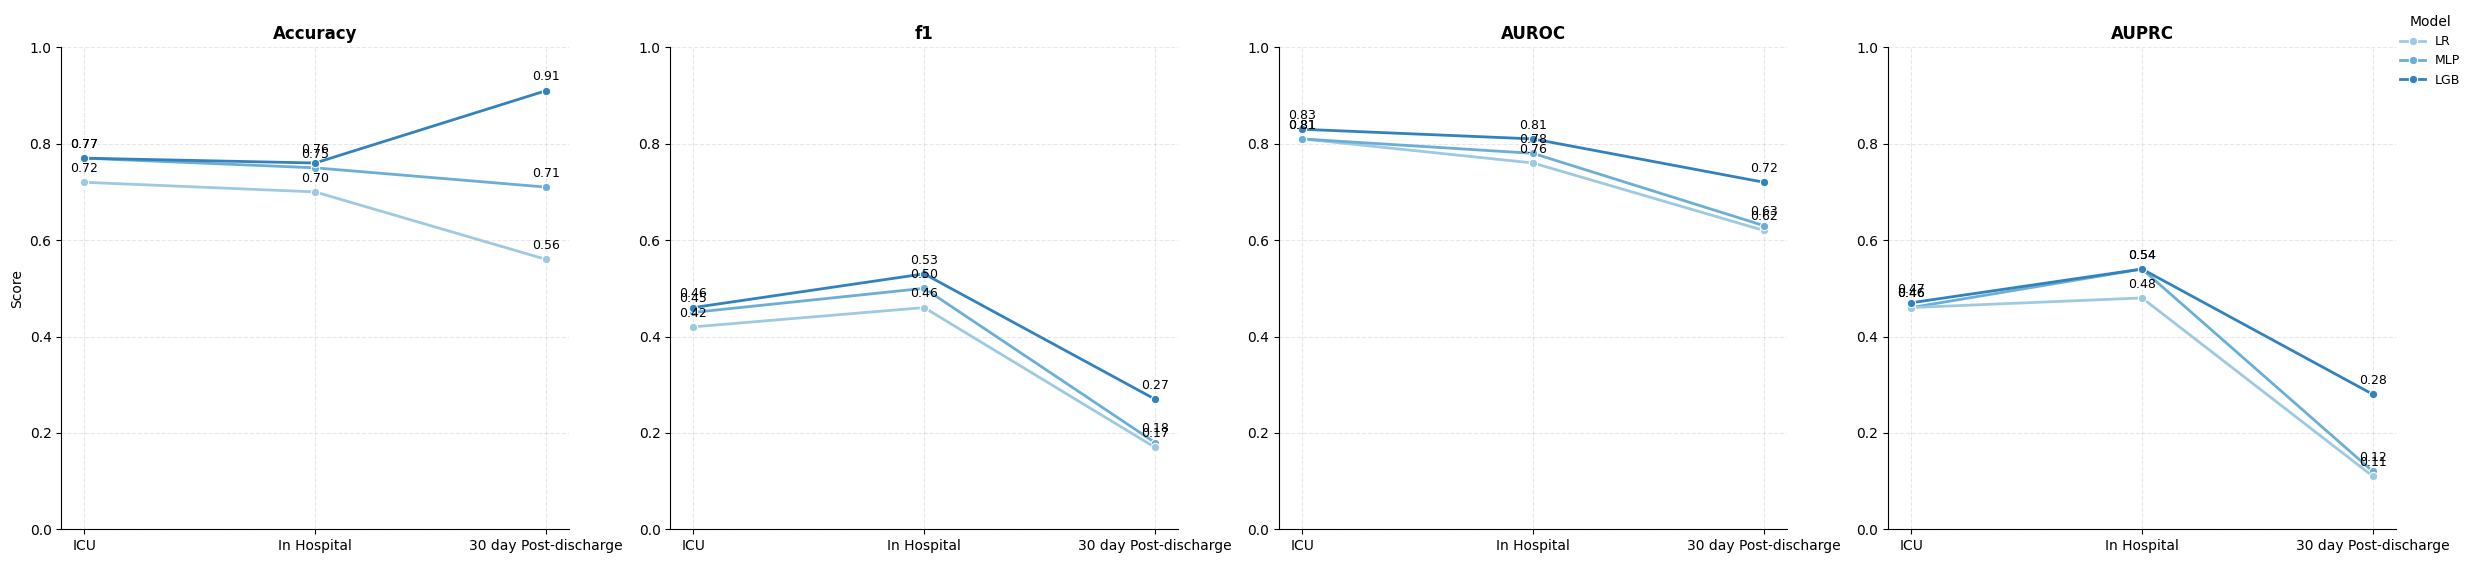

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 
data = {
    'Metric': ['Accuracy', 'Accuracy', 'Accuracy',
               'f1',   'f1',   'f1',
               'AUROC',    'AUROC',    'AUROC',
               'AUPRC',    'AUPRC',    'AUPRC'],
    'Horizon': ['ICU', 'In Hospital', '30 day Post-discharge'] * 4,

    # LR
    'LR':   [0.72, 0.70, 0.56,   0.42, 0.46, 0.17,   0.81, 0.76, 0.62,   0.46, 0.48, 0.11],
    # LGB
    'LGB':  [0.77, 0.76, 0.91,   0.46, 0.53, 0.27,   0.83, 0.81, 0.72,   0.47, 0.54, 0.28],
    # MLP
    'MLP':  [0.77, 0.75, 0.71,   0.45, 0.50, 0.18,   0.81, 0.78, 0.63,   0.46, 0.54, 0.12]
}
df = pd.melt(pd.DataFrame(data), id_vars=['Metric', 'Horizon'],
             var_name='Model', value_name='Score')


model_colors = {'LR': '#9ecae1', 'LGB': '#3182bd', 'MLP': '#6baed6'}


metric_order = ['Accuracy', 'f1', 'AUROC', 'AUPRC']
df['Metric'] = pd.Categorical(df['Metric'], categories=metric_order, ordered=True)
df = df.sort_values('Metric')

g = sns.FacetGrid(df, col='Metric', col_wrap=4, height=6, aspect=1, sharey=False) # Increased height and aspect
g.map_dataframe(sns.lineplot, x='Horizon', y='Score', hue='Model',
                marker='o', linewidth=2, palette=model_colors)

# 
g.set_titles("{col_name}")
for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontweight='bold')
    ax.set_ylim(0, 1)
    ax.grid(True, alpha=0.3, linestyle='--')


   
    for line in ax.lines:
        for x, y in zip(line.get_xdata(), line.get_ydata()):
            ax.text(x, y + 0.015, f"{y:.2f}", ha='center', va='bottom', fontsize=9, color='black')

g.set_xlabels("")


g.add_legend(title='Model', bbox_to_anchor=(1, 0.95), loc='upper right', borderaxespad=0, fontsize=9)

plt.tight_layout(rect=[0, 0.02, 1, 0.95])
plt.show()

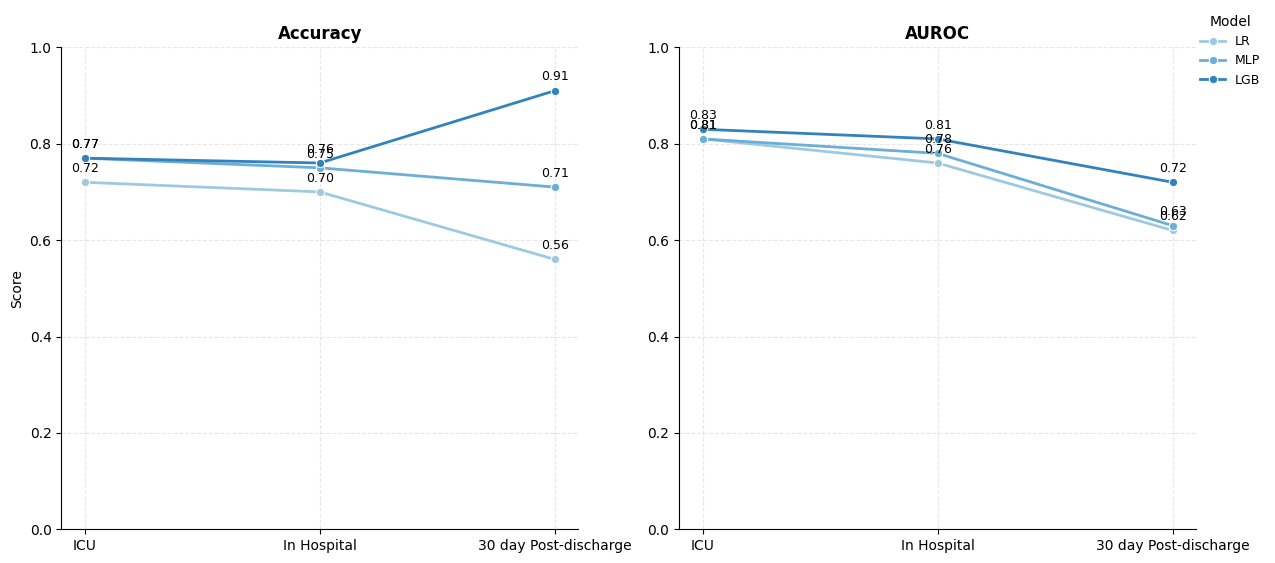

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = {
    'Metric': ['Accuracy', 'Accuracy', 'Accuracy',

               'AUROC',    'AUROC',    'AUROC'],
    'Horizon': ['ICU', 'In Hospital', '30 day Post-discharge'] * 2,

    # LR
    'LR':   [0.72, 0.70, 0.56,     0.81, 0.76, 0.62],
    # LGB
    'LGB':  [0.77, 0.76, 0.91,    0.83, 0.81, 0.72],
    # MLP
    'MLP':  [0.77, 0.75, 0.71,   0.81, 0.78, 0.63]
}
df = pd.melt(pd.DataFrame(data), id_vars=['Metric', 'Horizon'],
             var_name='Model', value_name='Score')


horizon_order = ['ICU', 'In Hospital', '30 day Post-discharge']

# Convert 'Horizon' to a categorical type with the specified order
df['Horizon'] = pd.Categorical(df['Horizon'], categories=horizon_order, ordered=True)


model_colors = {'LR': '#9ecae1', 'LGB': '#3182bd', 'MLP': '#6baed6'}


metric_order = ['Accuracy',  'AUROC']
df['Metric'] = pd.Categorical(df['Metric'], categories=metric_order, ordered=True)
df = df.sort_values('Metric')

g = sns.FacetGrid(df, col='Metric', col_wrap=2, height=6, aspect=1, sharey=False) # Increased height and aspect
g.map_dataframe(sns.lineplot, x='Horizon', y='Score', hue='Model',
                marker='o', linewidth=2, palette=model_colors)


g.set_titles("{col_name}")
for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontweight='bold')
    ax.set_ylim(0, 1)
    ax.grid(True, alpha=0.3, linestyle='--')


    
    for line in ax.lines:
        for x, y in zip(line.get_xdata(), line.get_ydata()):
            ax.text(x, y + 0.015, f"{y:.2f}", ha='center', va='bottom', fontsize=9, color='black')

g.set_xlabels("")


g.add_legend(title='Model', bbox_to_anchor=(1, 0.95), loc='upper right', borderaxespad=0, fontsize=9)

plt.tight_layout(rect=[0, 0.02, 1, 0.95])
plt.show()

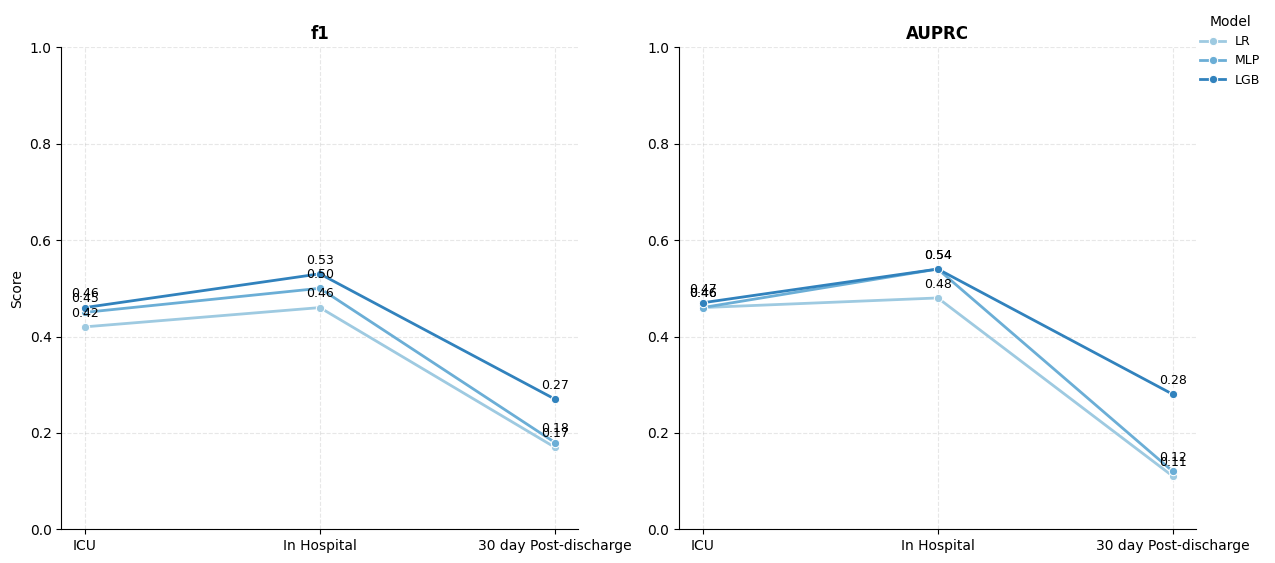

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = {
    'Metric': ['f1',   'f1',   'f1',
               'AUPRC',    'AUPRC',    'AUPRC'],
    'Horizon': ['ICU', 'In Hospital', '30 day Post-discharge'] * 2,

    # LR
    'LR':   [0.42, 0.46, 0.17,   0.46, 0.48, 0.11],
    # LGB
    'LGB':  [0.46, 0.53, 0.27,   0.47, 0.54, 0.28],
    # MLP
    'MLP':  [0.45, 0.50, 0.18,   0.46, 0.54, 0.12]
}
df = pd.melt(pd.DataFrame(data), id_vars=['Metric', 'Horizon'],
             var_name='Model', value_name='Score')

# Define the desired order for the 'Horizon' categories
horizon_order = ['ICU', 'In Hospital', '30 day Post-discharge']

# Convert 'Horizon' to a categorical type with the specified order
df['Horizon'] = pd.Categorical(df['Horizon'], categories=horizon_order, ordered=True)


model_colors = {'LR': '#9ecae1', 'LGB': '#3182bd', 'MLP': '#6baed6'}


metric_order = ['f1', 'AUPRC']
df['Metric'] = pd.Categorical(df['Metric'], categories=metric_order, ordered=True)
df = df.sort_values('Metric')

g = sns.FacetGrid(df, col='Metric', col_wrap=2, height=6, aspect=1, sharey=False) # Increased height and aspect
g.map_dataframe(sns.lineplot, x='Horizon', y='Score', hue='Model',
                marker='o', linewidth=2, palette=model_colors)


g.set_titles("{col_name}")
for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontweight='bold')
    ax.set_ylim(0, 1)
    ax.grid(True, alpha=0.3, linestyle='--')


   
    for line in ax.lines:
        for x, y in zip(line.get_xdata(), line.get_ydata()):
            ax.text(x, y + 0.015, f"{y:.2f}", ha='center', va='bottom', fontsize=9, color='black')

g.set_xlabels("")


g.add_legend(title='Model', bbox_to_anchor=(1, 0.95), loc='upper right', borderaxespad=0, fontsize=9)

plt.tight_layout(rect=[0, 0.02, 1, 0.95])
plt.show()

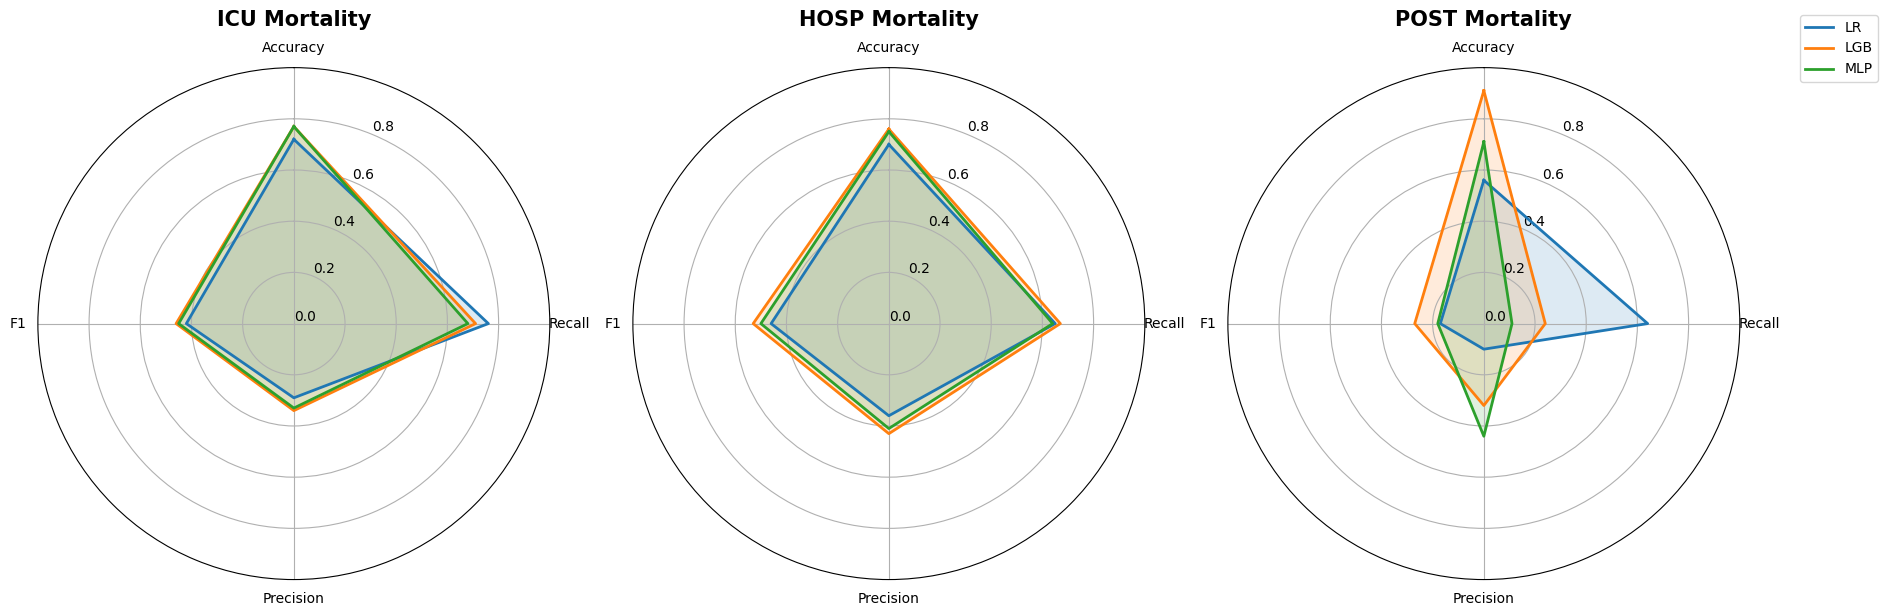

In [18]:
import numpy as np
import matplotlib.pyplot as plt


metrics = ['Accuracy', 'Recall', 'Precision', 'F1']

# performance
data = {
    'LR': {'ICU': [0.72, 0.76, 0.29, 0.42],
           'HOSP': [0.70, 0.65, 0.36, 0.46],
           'POST': [0.56, 0.64, 0.10, 0.17]},
    'LGB': {'ICU': [0.77, 0.71, 0.34, 0.46],
            'HOSP': [0.76, 0.67, 0.43, 0.53],
            'POST': [0.91, 0.24, 0.32, 0.27]},
    'MLP': {'ICU': [0.77, 0.68, 0.33, 0.45],
            'HOSP': [0.75, 0.64, 0.41, 0.50],
            'POST': [0.71, 0.11, 0.44, 0.18]}
}

#  radar for each stage ---
labels = np.array(metrics)
num_vars = len(labels)


angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

stages = ['ICU', 'HOSP', 'POST']

fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(polar=True))

for i, stage in enumerate(stages):
    ax = axes[i]
    vals_stage = {model: data[model][stage] for model in data}

    for model, vals in vals_stage.items():
        vals = np.concatenate((vals, [vals[0]]))  # 闭合
        ax.plot(angles, vals, label=model, linewidth=2)
        ax.fill(angles, vals, alpha=0.15)


    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_ylim(0, 1)
    ax.set_title(f'{stage} Mortality', size=15, pad=30, fontweight='bold') # Increased padding
    ax.set_yticks(np.arange(0, 1.0, 0.2)) # Smaller concentric circles


# Add a single legend for all plots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()